Resampled dataset saved to dataset2_resampled.csv


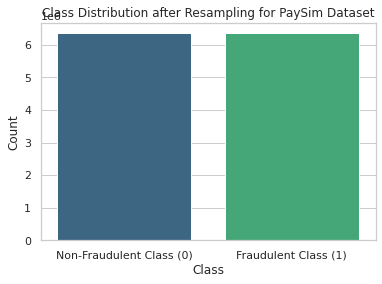

Statistics for Resampled Dataset (Numerical Columns):
                        Mean      Variance  Standard Deviation
step            3.065053e+02  3.010782e+04        1.735160e+02
amount          8.227182e+05  3.483026e+12        1.866287e+06
oldbalanceOrg   1.240367e+06  1.057114e+13        3.251328e+06
newbalanceOrig  5.227244e+05  6.254544e+12        2.500909e+06
oldbalanceDest  8.151560e+05  9.287932e+12        3.047611e+06
newbalanceDest  1.243041e+06  1.222764e+13        3.496804e+06
isFlaggedFraud  6.409725e-04  6.405617e-04        2.530932e-02
type_CASH_OUT   4.248417e-01  2.443512e-01        4.943190e-01
type_DEBIT      3.260100e-03  3.249472e-03        5.700414e-02
type_PAYMENT    1.692916e-01  1.406319e-01        3.750093e-01
type_TRANSFER   2.899021e-01  2.058589e-01        4.537168e-01
isFraud         5.000000e-01  2.500000e-01        5.000000e-01
R² Score for PaySim Dataset after Resampling:


In [ ]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Function to apply SMOTE and save the resampled dataset
def apply_smote_and_save(df, target_column, save_path):
    # Separate input features (X) and target labels (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled data into a DataFrame
    df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_column])], axis=1)

    # Save the resampled dataset to the specified path
    df_resampled.to_csv(save_path, index=False)
    print(f"Resampled dataset saved to {save_path}")

    return df_resampled

# Function to compute statistics on numerical columns
def compute_statistics(df):
    # Select only numerical columns for the statistics
    numerical_df = df.select_dtypes(include=[np.number])

    # Calculate mean, variance, and standard deviation for each numerical column
    stats = numerical_df.agg(['mean', 'var', 'std']).T
    stats.columns = ['Mean', 'Variance', 'Standard Deviation']

    print("Statistics for Resampled Dataset (Numerical Columns):")
    print(stats)
    return stats

# Plot class distribution for PaySim dataset after SMOTE
def plot_class_distribution(df, target_column, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 4))

    # Plot the bar graph
    sns.countplot(x=target_column, data=df, palette="viridis")

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')

    # Set custom x-axis labels for the classes
    plt.xticks([0, 1], ['Non-Fraudulent Class (0)', 'Fraudulent Class (1)'])

    # Show the plot
    plt.show()

# Function to split the data, train a model, and compute R²
def compute_r2_score(df, target_col):
    # Separate features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize a Random Forest Classifier
    model = RandomForestClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute the R² score
    r2 = r2_score(y_test, y_pred)

    return r2

# Path to the PaySim CSV file on Google Drive (Update with actual path)
csv_file_2 = 'paysim/paysim.csv'  # Update with actual filename if different

# Read the PaySim dataset
df2 = pd.read_csv(csv_file_2)

# One-hot encode the categorical column ('type') in the PaySim dataset
df2 = pd.get_dummies(df2, columns=['type'], drop_first=True)

# Exclude the identifier columns ('nameOrig' and 'nameDest') from the PaySim dataset
df2 = df2.drop(['nameOrig', 'nameDest'], axis=1)

# Apply SMOTE to PaySim dataset
df2_resampled = apply_smote_and_save(df2, 'isFraud', 'dataset2_resampled.csv')

# Plot class distribution after resampling
plot_class_distribution(df2_resampled, 'isFraud', 'Class Distribution after Resampling for PaySim Dataset')

# Compute statistics for the resampled (balanced) dataset
stats_resampled = compute_statistics(df2_resampled)

# Compute R² score for the resampled PaySim dataset
print("R² Score for PaySim Dataset after Resampling:")
r2_2 = compute_r2_score(df2_resampled, 'isFraud')
print(f"R² Score for PaySim Dataset: {r2_2}")